In [1]:
#!jt -l
# !jt -t oceans16 -T
# !jt -r

Notas:
--------
- [x] Estudiar Recency.__
    - [x] Histograma Row simple
    - [x] Probar esta función
    - [x] Implementar

##### Tarea anterior 

- [x] __Construir la variable Recency.__
    - [x] Sección para caso pequeño
    - [x] Función para estadnarizar
    - [x] Probar esta función
    - [x] Implementar
- [x] __Contruir Frecuency__
    - [x] Sección para caso pequeño
    - [x] Función para estadnarizar
    - [x] Probar esta función
    - [x] Implementar
- [x] __Construir Monetary__
    - [x] Sección para caso pequeño
    - [x] Función para estadnarizar
    - [x] Probar esta función
    - [x] Implementar   

# Inicio



__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`
- `Centro` ahora es `Centro_Cod`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

### import

In [3]:
#from adjustText import adjust_text
# from adjustText import *

In [4]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [5]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [6]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [7]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [8]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

In [9]:
#Histograma con porcentajes
from mizani.formatters import percent_format

### Funciones 
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [10]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

## Dicionario 
rename aplicado a `Precio promedio`

In [11]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
         ,'RFM Row':
                 ['Recency días','Frecuency_Row','Monetary']
        ,'RFM Customers':
                 ['Recency Actual','Frecuency Actual del Cliente','Monetary Actual']
        ,'Ticket Row':
                 ['Ticket Promedio','Ticket CV']
        ,'Ticket Customers':
                 ['Ticket Promedio Actual','Ticket CV Actual']
        }

### Colores 

In [12]:
('{:X}{:X}{:X}').format(31, 119, 180)
('{:X}{:X}{:X}').format(219, 96, 97)
('{:X}{:X}{:X}').format(87, 219, 95)

'57DB5F'

# Uso de F file

- `data_i_Ticket`: Monetary 
- `Clientes_i_RFM`: RFM Clientes 

## Abrir Archivo   Facturaciones


Se debe agregar el parametro `,index_col='Unnamed: 0'` de esta froma tal vez se pueda hacer un merge en base al indice

##### Data Facturaciones 

###### abrir 

In [13]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT Ticket'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_Ticket = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
data_i_Ticket.head(1)

,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,...,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,"Ticket_(mean,CV)",Ticket Promedio,Ticket CV
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,...,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,"(0, 0)",0.0,0.0


In [14]:
data_i_Ticket.columns

Index(['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Día natural',
       'Día Semana', 'Semana', 'Mes', 'Año', 'Población', 'Centro', 'Cliente',
       'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación',
       'Material Favorito', 'Frecuencia Historica', 'Mes_num',
       'Ticket_(mean,CV)', 'Ticket Promedio', 'Ticket CV'],
      dtype='object')

##### Funcion

###### def Funcion separador de tupla

In [15]:
test_str='(0,0)'

In [16]:
data_i_Ticket['Ticket_(mean,CV)']

61455              (0, 0)
61456              (0, 0)
61457          (110.0, 0)
61458      (88.0, 0.3536)
61459     (80.67, 0.3149)
               ...       
297036        (22.0, 0.0)
297037             (0, 0)
297038          (22.0, 0)
297039        (22.0, 0.0)
297040             (0, 0)
Name: Ticket_(mean,CV), Length: 198596, dtype: object

In [17]:
def tuple_selec(i,X):
    if(i==1):
        S = X.split(',')[i].split(')')[0]
    else:
        S = X.split(',')[i].split('(')[1]
    return float(S)
print(data_i_Ticket['Ticket_(mean,CV)'].apply( lambda x: tuple_selec(1,x)).describe() )

# data_i_Ticket['Ticket CV'] = data_i_Ticket['Ticket_(mean,CV)'].apply( lambda x: tuple_selec(1,x))

count    198596.000000
mean          0.366520
std           0.246208
min           0.000000
25%           0.243300
50%           0.383600
75%           0.485800
max           3.102100
Name: Ticket_(mean,CV), dtype: float64


##### Función 

In [18]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data_Refinada(data):
    start_time = time.time()

    df=data.copy()

    for i in ['Kilos Venta KG'
              ,'Precio'
              ,'Ticket Promedio', 'Ticket CV'
             ]:
        df[i]=df[i].astype('float64')
        
    for i in ['Kilos Venta KG'
              ,'Precio'
#               ,'Ticket Promedio', 'Ticket CV'
             ]:
        df[i]=df[i].astype('int64')
        

#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
#     #Separacion fecha
    
#     #ELiminado de DF_FULL
#     df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
#     df['Mes']=df["Día natural"].apply(lambda x: x.month)
#     df['Año']=df["Día natural"].apply(lambda x: x.year)
#     df['Semana']=df['Semana'].astype('int64')
    
#     df['Año']=df['Año'].astype('int64')
#     D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
#     df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
#     df=df[df['Día Semana']!='Domingo']
    
    print(df.dtypes)
    end_time = time.time()
    time_convert(end_time - start_time)
    return df


###### aplicación 

In [19]:
data_i_Ticket=Ajuste_data_Refinada(data_i_Ticket)
data_i_Ticket.head(2)

Material (Nombre)        object
Kilos Venta KG            int64
Precio                    int64
Día natural              object
Día Semana               object
Semana                   object
Mes                      object
Año                      object
Población                object
Centro                   object
Cliente                  object
Cluster                  object
Segmento.1               object
Categoría Cliente        object
Año Creación             object
Material Favorito        object
Frecuencia Historica     object
Mes_num                  object
Ticket_(mean,CV)         object
Ticket Promedio         float64
Ticket CV               float64
dtype: object
Time Lapsed = 0:0:1.698544979095459 
 H:m:s


,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,...,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,"Ticket_(mean,CV)",Ticket Promedio,Ticket CV
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,...,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,"(0, 0)",0.0,0.0
61456,1010078(Trutro Entero Selección),110,1174,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,...,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3,"(0, 0)",0.0,0.0


### Exploración F

##### histograma 

In [20]:
data_i_Ticket.shape

(198596, 21)

In [21]:
data_i_Ticket.columns

Index(['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Día natural',
       'Día Semana', 'Semana', 'Mes', 'Año', 'Población', 'Centro', 'Cliente',
       'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación',
       'Material Favorito', 'Frecuencia Historica', 'Mes_num',
       'Ticket_(mean,CV)', 'Ticket Promedio', 'Ticket CV'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Ticket Promedio'}>,
        <AxesSubplot:title={'center':'Ticket CV'}>]], dtype=object)

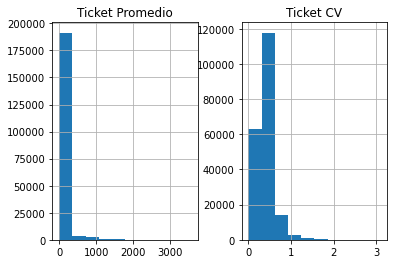

In [22]:
data_i_Ticket[['Ticket Promedio', 'Ticket CV']].hist()

In [23]:
data_i_Ticket[(data_i_Ticket.Año=='2021')]\
[['Ticket Promedio', 'Ticket CV']].describe().T

,count,mean,std,min,25%,50%,75%,max
Ticket Promedio,63389.0,83.228502,165.099098,0.0,24.4400,40.840,77.2200,2752.0000
Ticket CV,63389.0,0.377800,0.245167,0.0,0.2647,0.392,0.4921,3.1021


In [24]:
print(data_i_Ticket[(data_i_Ticket.Año=='2021')]\
[['Ticket Promedio', 'Ticket CV']].describe().T.to_latex\
      (float_format="{:,.2f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &     count &  mean &    std &  min &   25\% &   50\% &   75\% &      max \\
\midrule
Ticket Promedio & 63,389.00 & 83.23 & 165.10 & 0.00 & 24.44 & 40.84 & 77.22 & 2,752.00 \\
Ticket CV       & 63,389.00 &  0.38 &   0.25 & 0.00 &  0.26 &  0.39 &  0.49 &     3.10 \\
\bottomrule
\end{tabular}



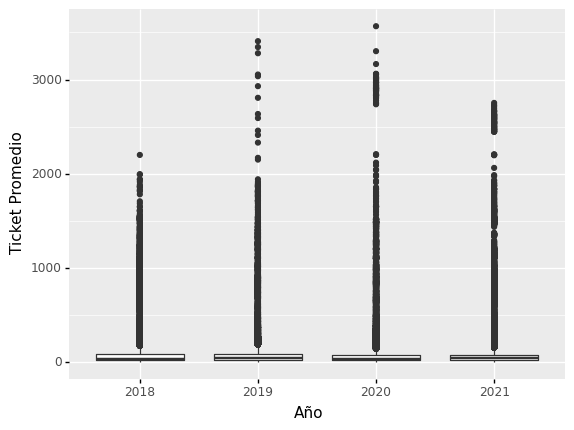

<ggplot: (125728261801)>

In [25]:
ggplot(data_i_Ticket,aes(x='Año'
                    ,y='Ticket Promedio'))\
+geom_boxplot()
# (mapping=None, data=data_i_Ticket, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

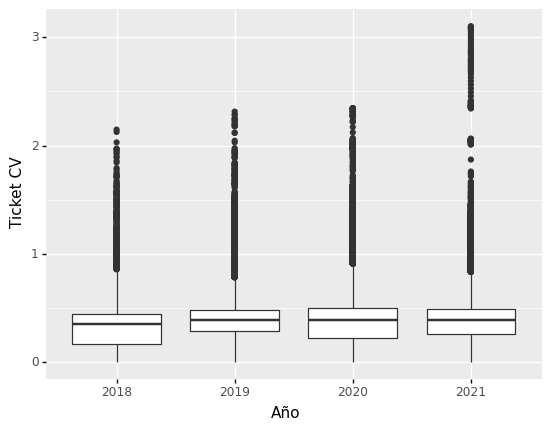

<ggplot: (125728313351)>

In [26]:
ggplot(data_i_Ticket,aes(x='Año'
                    ,y='Ticket CV'))\
+geom_boxplot()
# (mapping=None, data=data_i_Ticket, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

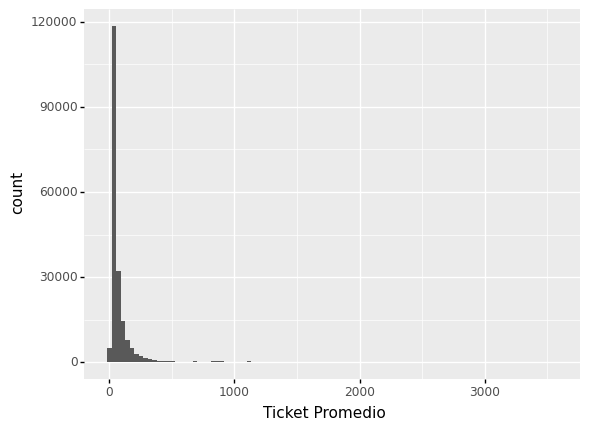

<ggplot: (125731316761)>

In [27]:
ggplot(data_i_Ticket,aes(x='Ticket Promedio'))\
+geom_histogram(bins=100)
# (mapping=None, data=data_i_Ticket, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

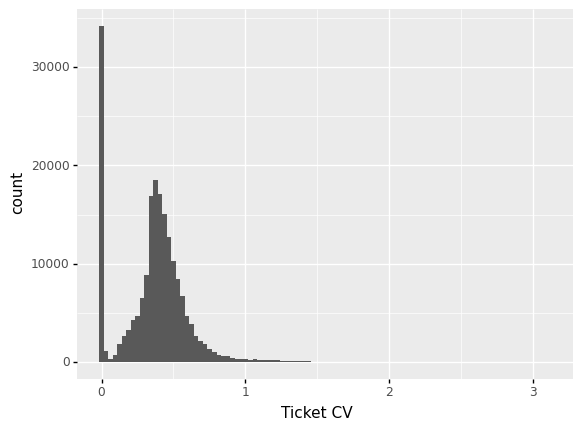

<ggplot: (125733965707)>

In [28]:
ggplot(data_i_Ticket,aes(x='Ticket CV'))\
+geom_histogram(bins=100)
# (mapping=None, data=data_i_Ticket, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

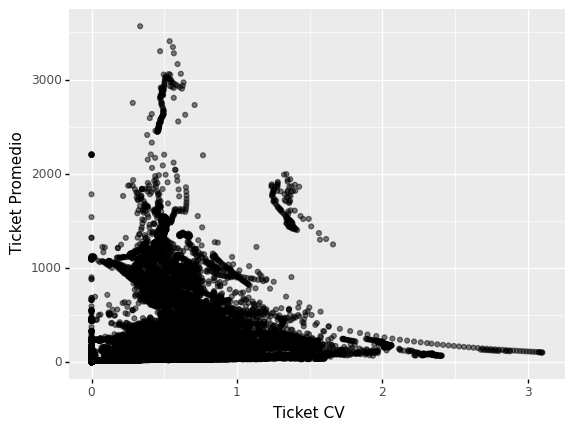

<ggplot: (125734025391)>

In [30]:
ggplot(data_i_Ticket,aes(x='Ticket CV', y='Ticket Promedio'))\
+geom_point(alpha=0.4)
# (mapping=None, data=data_i_Ticket, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

In [ ]:
ggplot(data_i_Ticket,aes(x='Ticket CV', y='Ticket Promedio'))\
+geom_point(alpha=0.4)
# (mapping=None, data=data_i_Ticket, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

##### Disperción 

######  Dic_col['Ticket Row'][0]

In [30]:
Dic_col['Ticket Row'][0]

'Ticket Promedio'

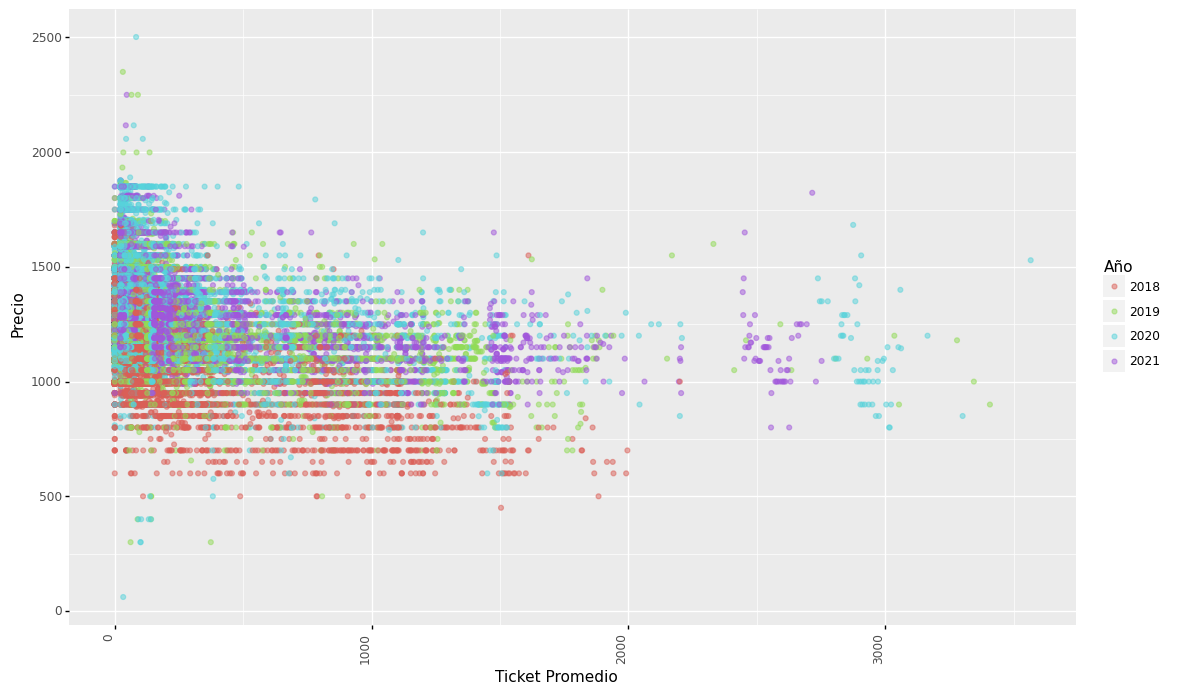

<ggplot: (104812177583)>

In [31]:
df=data_i_Ticket.copy()
X_Graph=Dic_col['Ticket Row'][0]
Y_Graph='Precio'
# df[X_Graph]=df[X_Graph].astype('int64')
# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color='Año'
                 ))
+geom_point(alpha=0.5)
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 

)      

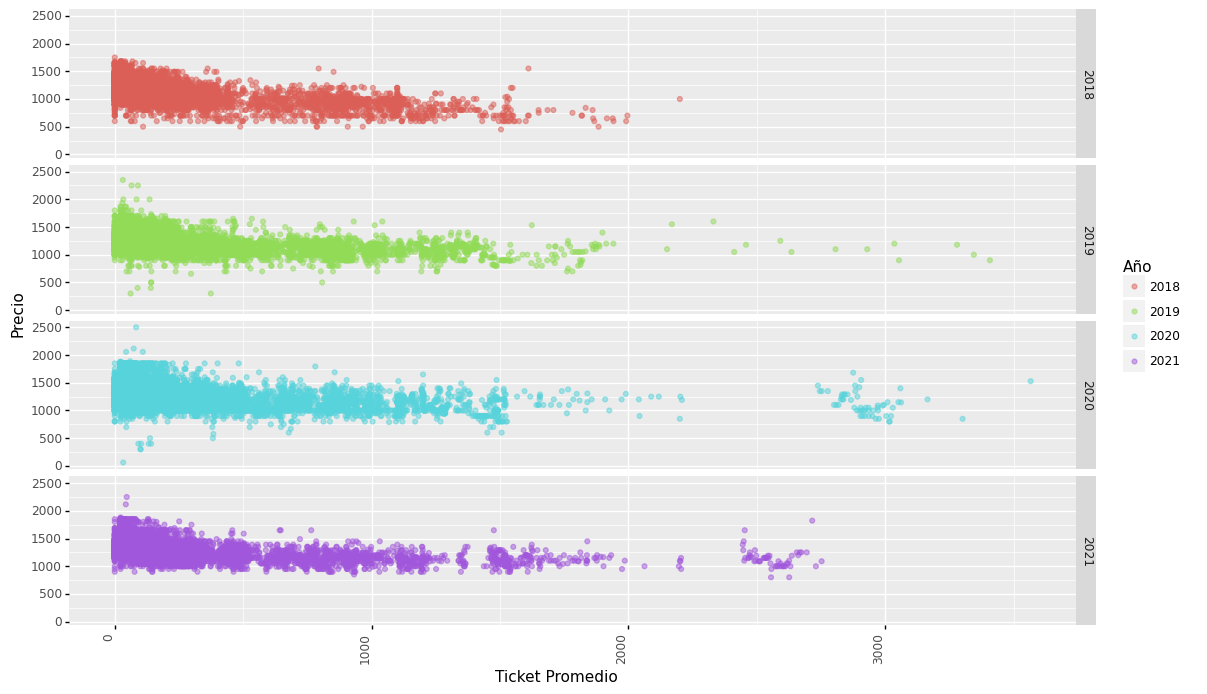

<ggplot: (104705125316)>

In [32]:
df=data_i_Ticket.copy()
X_Graph=Dic_col['Ticket Row'][0]
Y_Graph='Precio'
# df[X_Graph]=df[X_Graph].astype('int64')
# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color='Año'
                 ))
+geom_point(alpha=0.5)
+facet_grid('Año~.')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 

)      

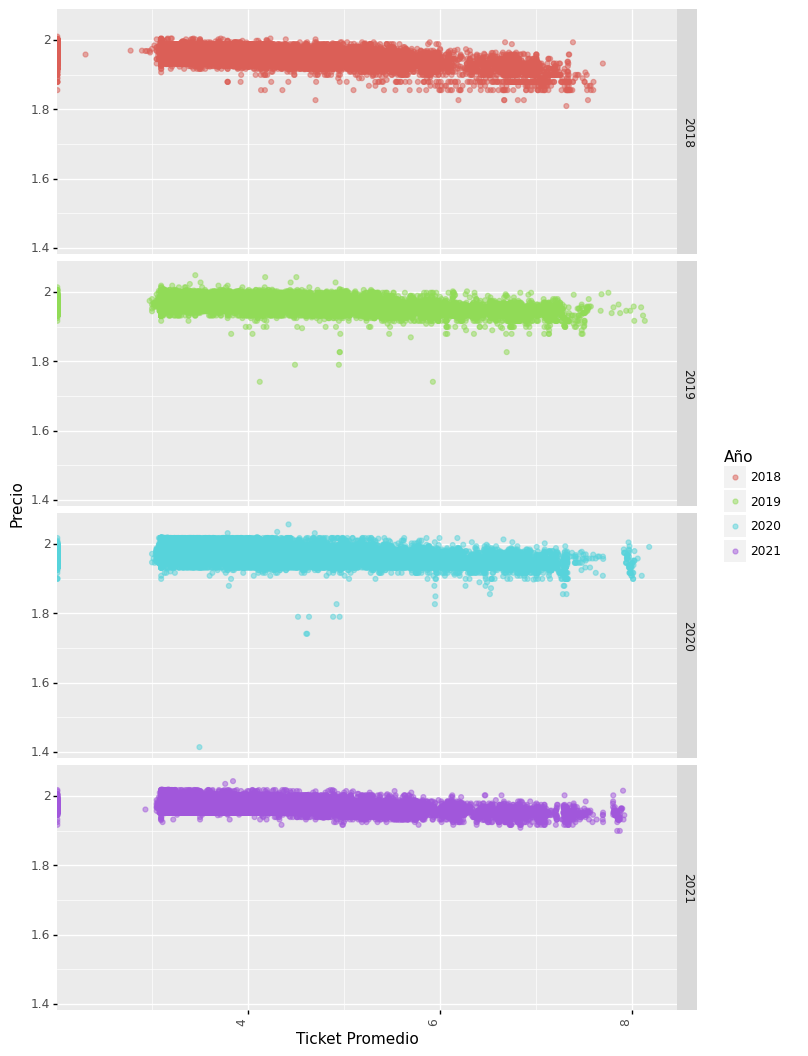

<ggplot: (104704014571)>

In [33]:
df=data_i_Ticket.copy()
X_Graph=Dic_col['Ticket Row'][0]
#'Kilos Venta KG'
Y_Graph='Precio'
Color_Graph='Año'


#int
# df[X_Graph]=df[X_Graph].astype('int64')

df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color=Color_Graph
                 ))
+geom_point(alpha=0.5)
+facet_grid('Año~.')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,13)) 

)      

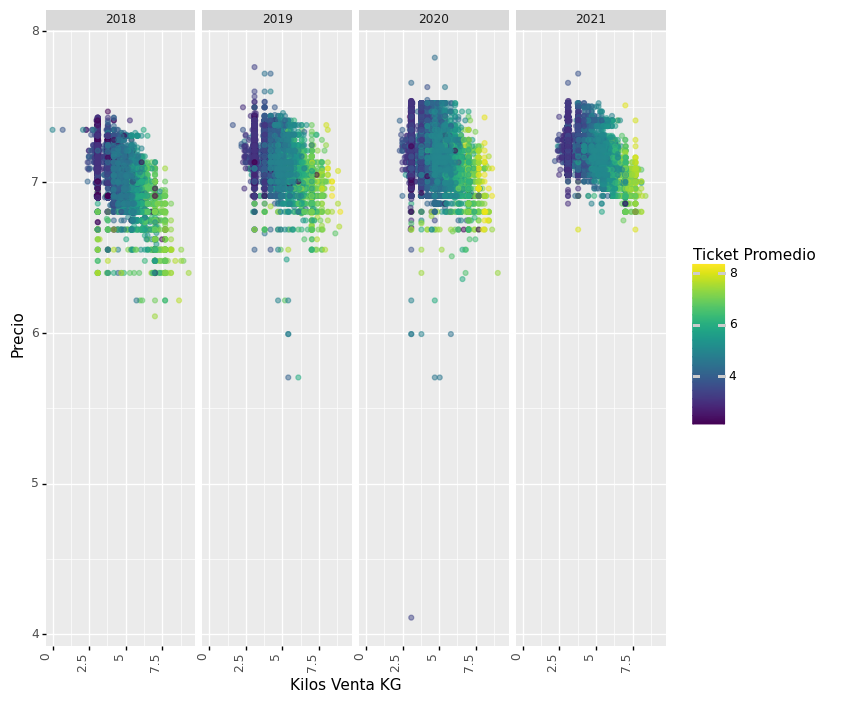

<ggplot: (104692654111)>

In [34]:
df=data_i_Ticket.copy()
X_Graph='Kilos Venta KG'
Y_Graph='Precio'
Color_Graph=Dic_col['Ticket Row'][0]


#int
# df[X_Graph]=df[X_Graph].astype('int64')

df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color=Color_Graph
                 ))
+geom_point(alpha=0.5)
+facet_grid('.~Año')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,8)) 

)      

 ####  geom_bin2d

C:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin_2d : Removed 5073 rows containing non-finite values.


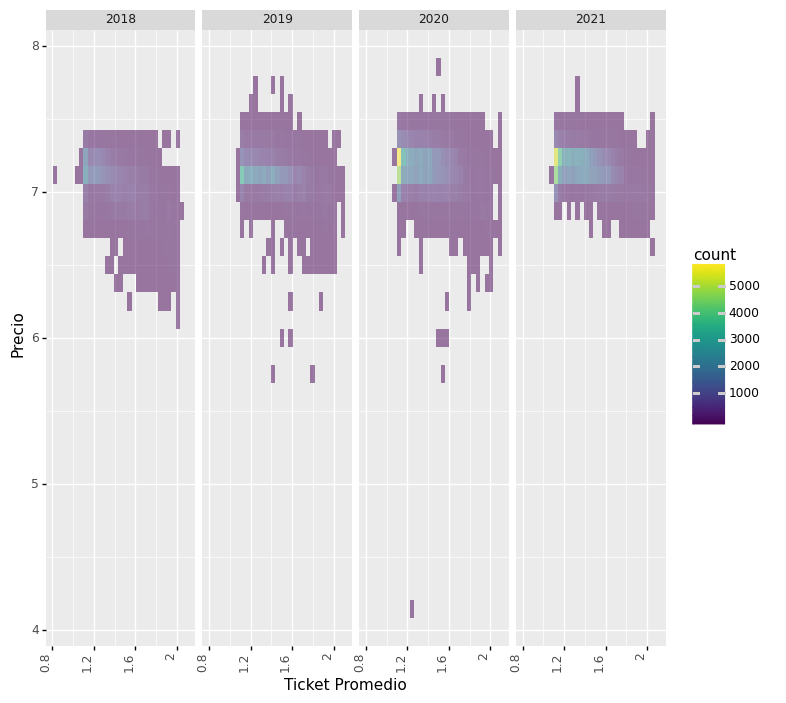

<ggplot: (104806138558)>

In [35]:
df=data_i_Ticket.copy()
X_Graph=Dic_col['Ticket Row'][0]#'Kilos Venta KG'
Y_Graph='Precio'
Color_Graph=Dic_col['Ticket Row'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
+facet_grid('.~Año')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,8)) 

)      

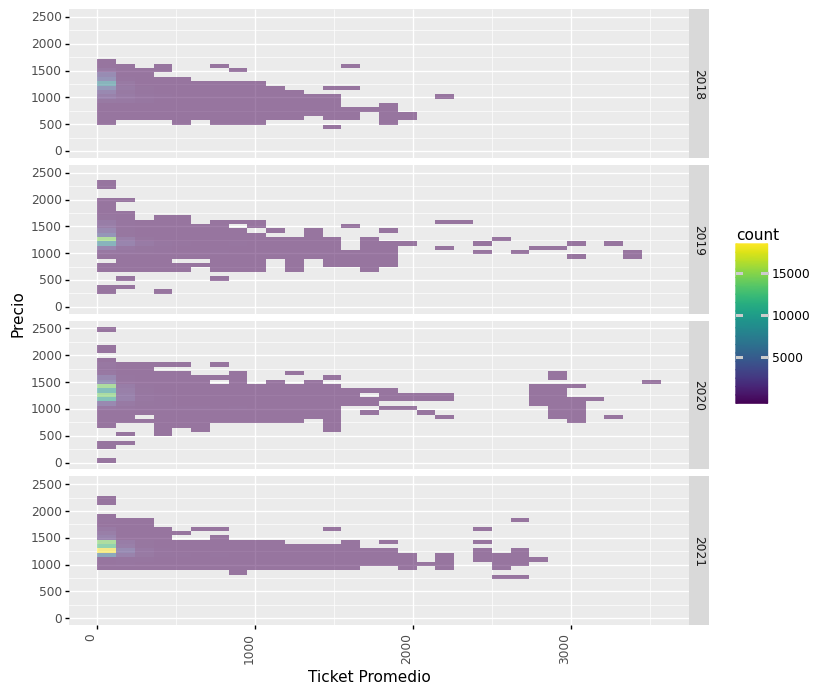

<ggplot: (104721556435)>

In [36]:
df=data_i_Ticket.copy()
X_Graph=Dic_col['Ticket Row'][0]#'Kilos Venta KG'
Y_Graph='Precio'
Color_Graph=Dic_col['Ticket Row'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
+facet_grid('Año~.')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,8)) 

)      

###### Dic_col['Ticket Row'][1] 

In [37]:
Dic_col['Ticket Row'][1]

'Ticket CV'

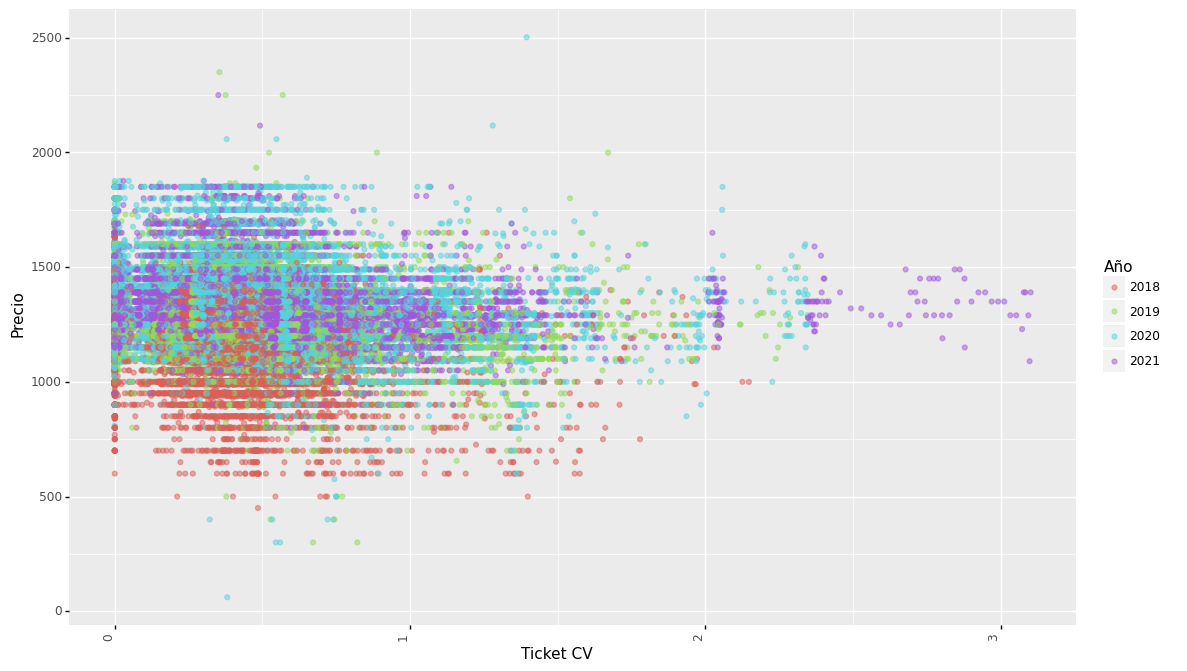

<ggplot: (104699250131)>

In [38]:
df=data_i_Ticket.copy()
X_Graph=Dic_col['Ticket Row'][1]
Y_Graph='Precio'
# df[X_Graph]=df[X_Graph].astype('int64')
# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color='Año'
                 ))
+geom_point(alpha=0.5)
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 

)      

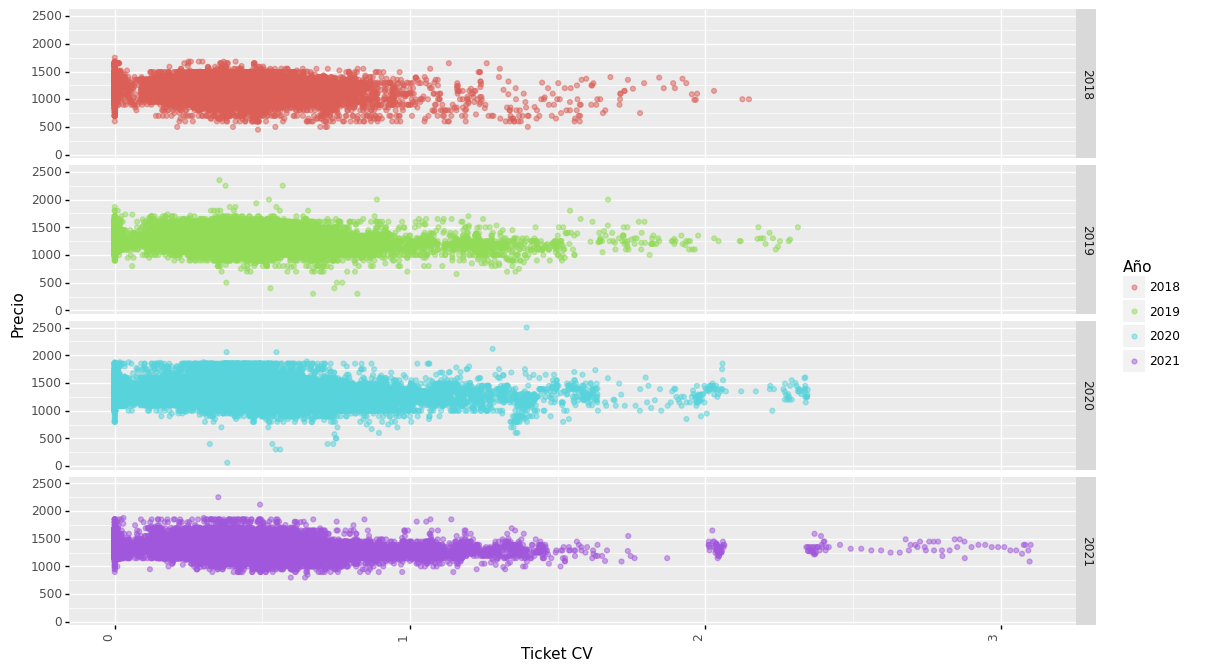

<ggplot: (104699406020)>

In [39]:
df=data_i_Ticket.copy()
X_Graph=Dic_col['Ticket Row'][1]
Y_Graph='Precio'
# df[X_Graph]=df[X_Graph].astype('int64')
# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color='Año'
                 ))
+geom_point(alpha=0.5)
+facet_grid('Año~.')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 

)      

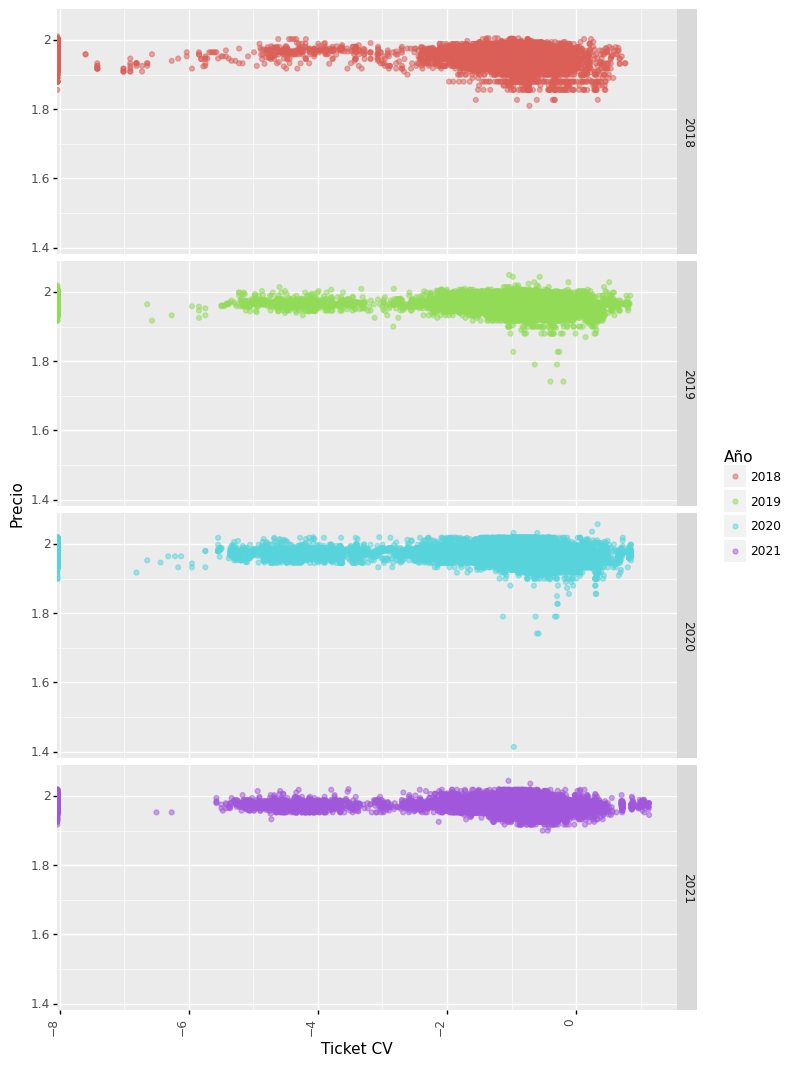

<ggplot: (104812128350)>

In [40]:
df=data_i_Ticket.copy()
X_Graph=Dic_col['Ticket Row'][1]
#'Kilos Venta KG'
Y_Graph='Precio'
Color_Graph='Año'


#int
# df[X_Graph]=df[X_Graph].astype('int64')

df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color=Color_Graph
                 ))
+geom_point(alpha=0.5)
+facet_grid('Año~.')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,13)) 

)      

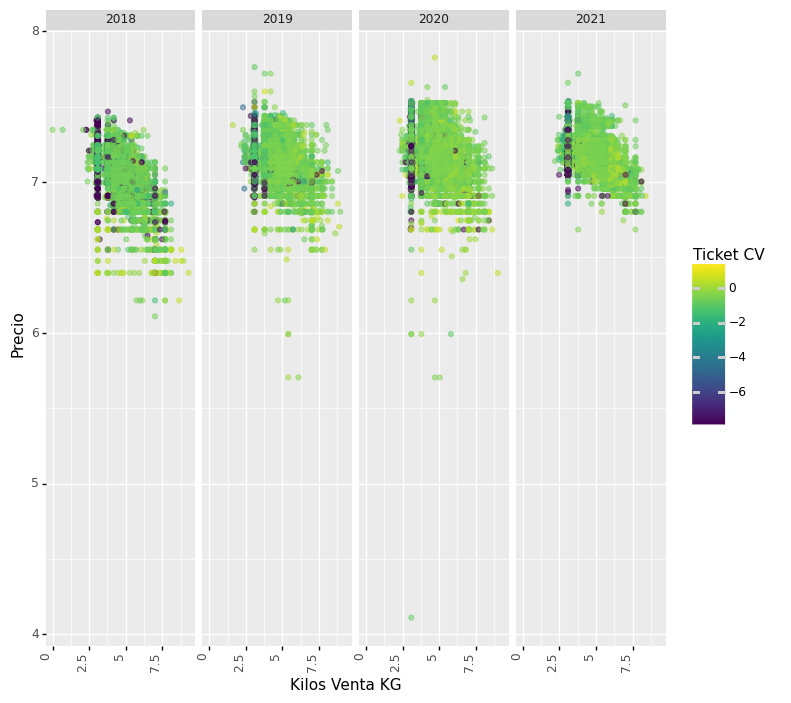

<ggplot: (104707850768)>

In [41]:
df=data_i_Ticket.copy()
X_Graph='Kilos Venta KG'
Y_Graph='Precio'
Color_Graph=Dic_col['Ticket Row'][1]


#int
# df[X_Graph]=df[X_Graph].astype('int64')

df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color=Color_Graph
                 ))
+geom_point(alpha=0.5)
+facet_grid('.~Año')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,8)) 

)      

 ####  geom_bin2d

C:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin_2d : Removed 195306 rows containing non-finite values.


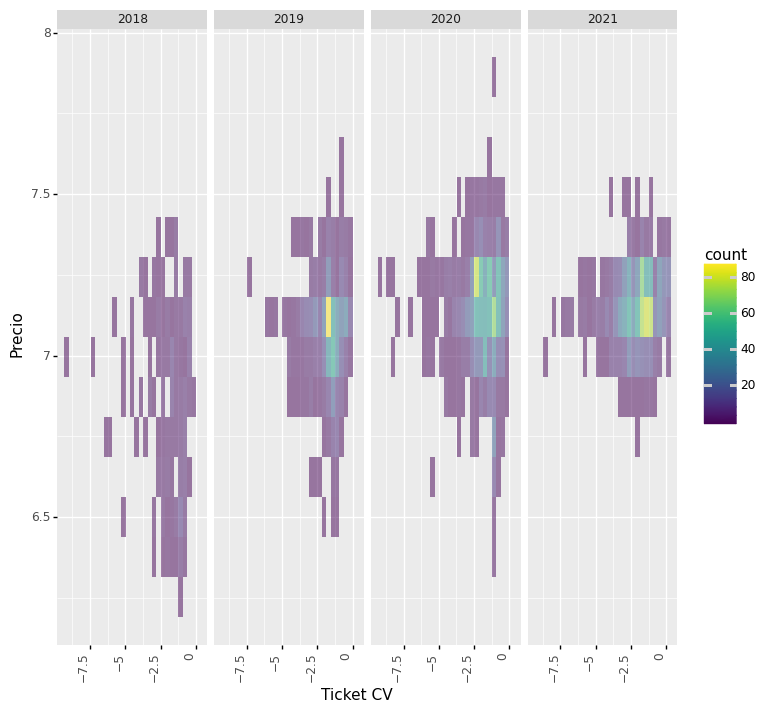

<ggplot: (104702788181)>

In [42]:
df=data_i_Ticket.copy()
X_Graph=Dic_col['Ticket Row'][1]
#'Kilos Venta KG'
Y_Graph='Precio'
Color_Graph=Dic_col['Ticket Row'][1]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
+facet_grid('.~Año')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,8)) 

)      

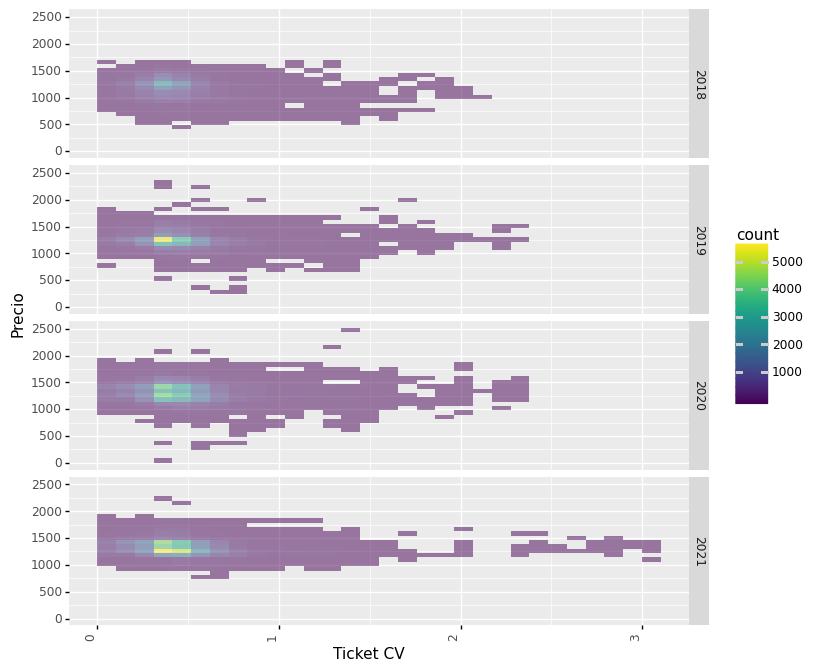

<ggplot: (104702221629)>

In [43]:
df=data_i_Ticket.copy()
X_Graph=Dic_col['Ticket Row'][1]
#'Kilos Venta KG'
Y_Graph='Precio'
Color_Graph=Dic_col['Ticket Row'][1]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
+facet_grid('Año~.')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,8)) 

)      

###### Descripción por cliente 

In [44]:
df_G=data_i_Ticket[['Cliente',Dic_col['Ticket Row'][0]]].groupby('Cliente').describe()
df_G

Ticket Promedio                                                \
                   count        mean        std  min       25%     50%   
Cliente                                                                  
10003742             1.0    0.000000        NaN  0.0    0.0000    0.00   
10007508           208.0   88.727212   8.680817  0.0   88.0675   91.02   
10017269            78.0   21.667564   2.487801  0.0   21.8825   22.00   
10023880            20.0   25.281000   6.295641  0.0   25.0425   27.34   
10028999            13.0   20.307692   6.101702  0.0   22.0000   22.00   
...                  ...         ...        ...  ...       ...     ...   
9992154             70.0   44.868714  11.636244  0.0   37.7650   41.47   
9993925            543.0  135.229540  23.000279  0.0  125.6100  141.93   
9994662             11.0   20.000000   6.633250  0.0   22.0000   22.00   
9994800              3.0   14.666667  12.701706  0.0   11.0000   22.00   
9997223              1.0    0.000000        NaN  0.0    0.0000    0.00   

                            
               75%     max  
Cliente                     
10003742    0.0000    0.00  
10007508   93.0050  110.00  
10017269   22.0400   22.05  
10023880   27.9025   29.33  
10028999   22.0000   22.00  
...            ...     ...  
9992154    50.6375   77.00  
9993925   151.9400  160.45  
9994662    22.0000   22.00  
9994800    22.0000   22.00  
9997223     0.0000    0.00  

[5073 rows x 8 columns]

## Actual Cliente 

##### utlimo registro  (No utilizado)

In [45]:
Dic_col['Ticket Row']

['Ticket Promedio', 'Ticket CV']

In [46]:
Dic_col['Ticket Row'][0]

'Ticket Promedio'

In [47]:
df=data_i_Ticket.copy()

In [48]:
df_G=data_i_Ticket[['Cliente','Día natural']].groupby('Cliente').max().reset_index()
df_G

,Cliente,Día natural
0,10003742,2020-05-23
1,10007508,2021-10-26
2,10017269,2021-10-23
3,10023880,2021-09-09
4,10028999,2021-09-24
...,...,...
5068,9992154,2021-08-18
5069,9993925,2021-10-26
5070,9994662,2021-10-14
5071,9994800,2021-06-30


In [49]:
pd.merge(df,df_G,how='right')

,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,...,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,"Ticket_(mean,CV)",Ticket Promedio,Ticket CV
0,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,...,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,"(0, 0)",0.00,0.0000
1,1010078(Trutro Entero Selección),88,1590,2021-10-26,Martes,43,Octubre,2021,Puente Alto,Sucursal Lo Espejo,...,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,10,"(93.18, 0.3896)",93.18,0.3896
2,1010078(Trutro Entero Selección),22,1476,2021-10-23,Sábado,42,Octubre,2021,Paine,Sucursal Lo Espejo,...,Clásico,Cobertura Pequeno SD,Emprendedores,2007,1010078,101,10,"(22.04, 0.028)",22.04,0.0280
3,1010078(Trutro Entero Selección),22,1550,2021-09-09,Jueves,36,Septiembre,2021,Pedro Aguirre Cerda,Sucursal Miraflores,...,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020001,383,9,"(27.79, 0.4449)",27.79,0.4449
4,1010078(Trutro Entero Selección),22,1300,2021-09-24,Viernes,38,Septiembre,2021,Lo Barnechea,Sucursal Huechuraba,...,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010078,62,9,"(22.0, 0.0)",22.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,1010078(Trutro Entero Selección),66,1150,2021-08-18,Miércoles,33,Agosto,2021,San Miguel,Sucursal Miraflores,...,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020013,113,8,"(35.74, 0.5078)",35.74,0.5078
5069,1010078(Trutro Entero Selección),198,1550,2021-10-26,Martes,43,Octubre,2021,Quilicura,Sucursal Miraflores,...,Clásico,Cobertura Mediano SD,Especialista en Crud,2012,1010267,594,10,"(160.45, 0.5112)",160.45,0.5112
5070,1010078(Trutro Entero Selección),22,1450,2021-10-14,Jueves,41,Octubre,2021,San Bernardo,Sucursal Miraflores,...,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010078,37,10,"(22.0, 0.0)",22.00,0.0000
5071,1010078(Trutro Entero Selección),22,1150,2021-06-30,Miércoles,26,Junio,2021,Penalolen,Sucursal Huechuraba,...,Clásico,Cobertura Pequeno SD,Emprendedores,2020,1010267,7,6,"(22.0, 0.0)",22.00,0.0000


##### Calculo Valor actual 

In [31]:
df=data_i_Ticket.copy()

In [32]:
df_g=df[['Cliente','Kilos Venta KG']].groupby('Cliente')\
        .mean().reset_index()\
        .rename(columns={'Kilos Venta KG':Dic_col['Ticket Customers'][0]})
df_g

,Cliente,Ticket Promedio Actual
0,10003742,22.000000
1,10007508,93.158654
2,10017269,22.038462
3,10023880,27.500000
4,10028999,22.000000
...,...,...
5068,9992154,36.171429
5069,9993925,160.517495
5070,9994662,22.000000
5071,9994800,22.000000


In [33]:
df_g.isnull().sum()

Cliente                   0
Ticket Promedio Actual    0
dtype: int64

In [35]:
df_G=df[['Cliente','Kilos Venta KG']].groupby('Cliente')\
        .std().reset_index()\
        .rename(columns={'Kilos Venta KG':'Ticket std Actual'})
print(
df_G.isnull().sum()
)
df_G=df_G.fillna(0)
df_G.head()

Cliente                0
Ticket std Actual    367
dtype: int64


,Cliente,Ticket std Actual
0,10003742,0.000000
1,10007508,36.215256
2,10017269,0.612474
3,10023880,12.102631
4,10028999,0.000000


In [36]:
df_group=pd.merge(df_g,df_G,how='right')

df_group[Dic_col['Ticket Customers'][1]]=\
df_group.apply(lambda x: 
               x['Ticket std Actual']/
               x[Dic_col['Ticket Customers'][0]] ,axis=1)
df_group

,Cliente,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual
0,10003742,22.000000,0.000000,0.000000
1,10007508,93.158654,36.215256,0.388748
2,10017269,22.038462,0.612474,0.027791
3,10023880,27.500000,12.102631,0.440096
4,10028999,22.000000,0.000000,0.000000
...,...,...,...,...
5068,9992154,36.171429,18.376080,0.508027
5069,9993925,160.517495,81.963154,0.510618
5070,9994662,22.000000,0.000000,0.000000
5071,9994800,22.000000,0.000000,0.000000


##### Descripción 

######  Promedio std

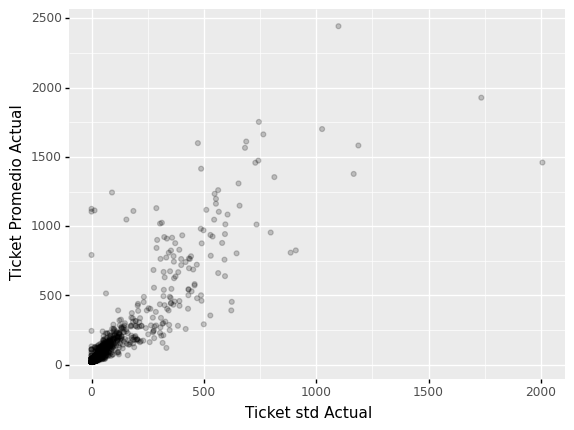

<ggplot: (125737013227)>

In [42]:
ggplot(df_group,aes(y='Ticket Promedio Actual',
                    x='Ticket std Actual'))\
+geom_point(alpha=0.2)
# (mapping=None, data=data_i_Ticket, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

######  lote CV

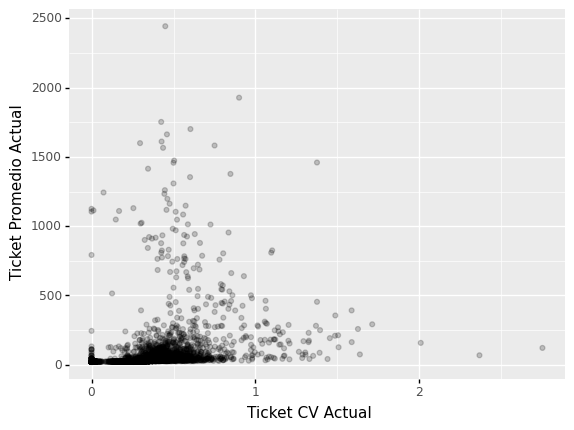

<ggplot: (125736996843)>

In [41]:
ggplot(df_group,aes(y='Ticket Promedio Actual',
                    x='Ticket CV Actual'))\
+geom_point(alpha=0.2)

# (mapping=None, data=data_i_Ticket, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

# Analisis

Dataframes de interes:

- df_fecha_fin:
    - Respresneta el Recency ctual
    - `(df_fecha_fin.rename(columns={'Recency Actual':'Recency actual del Cliente'})`
    
    
- data_i_Ticket:
    
    - `Recency días`
    - Representa el Recency al momento de realizar al compra.
- df_g:

    - Representa el valor promedio del Recency del cliente
    -`df_g.rename(columns ={'Monetary':'Recency Promedio Cliente'})`
            

In [61]:

print( 'Clientes del ', Tipo_de_Cliente,' que solo han comprado una vez el producto ',Y_producto ,': \n ===>', 
    (data_i_Ticket.groupby('Cliente').count()['Día natural']<2).sum())

print(
    'Total de clientes del ',Tipo_de_Cliente ,' que han comprado el prodcuto'
    ,Y_producto ,': \n ===>', 
    len(data_i_Ticket.Cliente.unique())
)

print('Cantidad de clientes fuera:  ',
      
      "{:,.1%}".format(
     (data_i_Ticket.groupby('Cliente').count()['Día natural']<2).sum()/
        len(data_i_Ticket.Cliente.unique())
      )
      )


Clientes del  Tradicional  que solo han comprado una vez el producto  1010078 : 
 ===> 367
Total de clientes del  Tradicional  que han comprado el prodcuto 1010078 : 
 ===> 5073
Cantidad de clientes fuera:   7.2%


## Tablas 


### con todos los valores 

##### Filas de cada distribcuión 

###### Actual por Cliente

In [62]:
Dic_col.keys()

dict_keys(['Base', 'Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos', 'RFM Row', 'RFM Customers', 'Ticket Row', 'Ticket Customers'])

In [63]:
Clientes_i=df_group.copy()

In [64]:
df_Actual=pd.DataFrame(
(Clientes_i[Dic_col['Ticket Customers']].describe())).T.round(3)
df_Actual

,count,mean,std,min,25%,50%,75%,max
Ticket Promedio Actual,5073.0,58.246,143.578,18.0,22.0,22.062,34.222,2443.105
Ticket CV Actual,5073.0,0.206,0.265,0.0,0.0,0.013,0.381,2.750


######  Promedio de Cada Cliente sobre sus Facturas
Se toman todas las facturas, se calcula el valor promedio del atributo para cada Cliente



In [66]:
# df_F_row_Promedio = data_i_Ticket[Dic_col['Ticket Row']+['Cliente']].groupby('Cliente').mean()
# df_F_row_Promedio.rename()


In [67]:
# df_gro_P=pd.DataFrame(
# (df_F_row_Promedio.describe().round(3))).T
# df_gro_P

###### Facturas 
Distribución General


In [68]:
Dic_col['Ticket Row']

['Ticket Promedio', 'Ticket CV']

In [69]:
df=data_i_Ticket.copy()
df=df.rename(columns ={
                        Dic_col['Ticket Row'][0]: (Dic_col['Ticket Row'][0]+' Facturas')
                        ,Dic_col['Ticket Row'][1]: (Dic_col['Ticket Row'][1]+' Facturas')
                      })
df.head(1)

,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,...,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,"Ticket_(mean,CV)",Ticket Promedio Facturas,Ticket CV Facturas
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,...,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,"(0, 0)",0.0,0.0


In [70]:
# df_Fact_P=
pd.DataFrame(
(df[(Dic_col['Ticket Row'][0]+' Facturas')].describe())).T.round(3).copy()
# df_Fact_P

,count,mean,std,min,25%,50%,75%,max
Ticket Promedio Facturas,198596.0,88.721,176.071,0.0,24.44,40.42,78.6,3566.0


In [71]:
df_Fact_P=pd.DataFrame(
(df[[  i +' Facturas' for i in Dic_col['Ticket Row'] ]].describe())).T.round(3).copy()
df_Fact_P

,count,mean,std,min,25%,50%,75%,max
Ticket Promedio Facturas,198596.0,88.721,176.071,0.0,24.440,40.420,78.600,3566.000
Ticket CV Facturas,198596.0,0.367,0.246,0.0,0.243,0.384,0.486,3.102


In [72]:
print(pd.DataFrame(
(df[[  i +' Facturas' for i in Dic_col['Ticket Row'] ]].describe())).T.round(3).to_latex(float_format="{:,.1f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &     count &  mean &   std &  min &  25\% &  50\% &  75\% &     max \\
\midrule
Ticket Promedio Facturas & 198,596.0 &  88.7 & 176.1 &  0.0 & 24.4 & 40.4 & 78.6 & 3,566.0 \\
Ticket CV Facturas       & 198,596.0 &   0.4 &   0.2 &  0.0 &  0.2 &  0.4 &  0.5 &     3.1 \\
\bottomrule
\end{tabular}



##### Juntar ambas tablas

In [75]:
pd.concat([
            df_Fact_P
#             ,df_gro_P
           ,df_Actual
            ])

,count,mean,std,min,25%,50%,75%,max
Ticket Promedio Facturas,198596.0,88.721,176.071,0.0,24.440,40.420,78.600,3566.000
Ticket CV Facturas,198596.0,0.367,0.246,0.0,0.243,0.384,0.486,3.102
Ticket Promedio Actual,5073.0,58.246,143.578,18.0,22.000,22.062,34.222,2443.105
Ticket CV Actual,5073.0,0.206,0.265,0.0,0.000,0.013,0.381,2.750


###### CV 

In [76]:
pd.concat([
            pd.DataFrame( df_Fact_P.iloc[1]).T
#             ,pd.DataFrame( df_gro_P.iloc[1]).T
            ,pd.DataFrame( df_Actual.iloc[1]).T
            ])

,count,mean,std,min,25%,50%,75%,max
Ticket CV Facturas,198596.0,0.367,0.246,0.0,0.243,0.384,0.486,3.102
Ticket CV Actual,5073.0,0.206,0.265,0.0,0.000,0.013,0.381,2.750


###### Lote 

In [77]:
pd.concat([
            pd.DataFrame( df_Fact_P.iloc[0]).T
#             ,pd.DataFrame( df_gro_P.iloc[0]).T
            ,pd.DataFrame( df_Actual.iloc[0]).T
            ])

,count,mean,std,min,25%,50%,75%,max
Ticket Promedio Facturas,198596.0,88.721,176.071,0.0,24.44,40.420,78.600,3566.000
Ticket Promedio Actual,5073.0,58.246,143.578,18.0,22.00,22.062,34.222,2443.105


#### Latex 

###### General Todod junto 

In [79]:
#General
print(pd.concat([
            df_Fact_P
#             ,df_gro_P
           ,df_Actual
            ]).to_latex\
      (float_format="{:,.0f}".format)
#      ()
     )

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &  mean &  std &  min &  25\% &  50\% &  75\% &   max \\
\midrule
Ticket Promedio Facturas & 198,596 &    89 &  176 &    0 &   24 &   40 &   79 & 3,566 \\
Ticket CV Facturas       & 198,596 &     0 &    0 &    0 &    0 &    0 &    0 &     3 \\
Ticket Promedio Actual   &   5,073 &    58 &  144 &   18 &   22 &   22 &   34 & 2,443 \\
Ticket CV Actual         &   5,073 &     0 &    0 &    0 &    0 &    0 &    0 &     3 \\
\bottomrule
\end{tabular}



##### Fragmentado 

###### Lote Mean 

In [80]:
print(pd.concat([
            pd.DataFrame( df_Fact_P.iloc[0]).T
#             ,pd.DataFrame( df_gro_P.iloc[0]).T
            ,pd.DataFrame( df_Actual.iloc[0]).T
            ]).to_latex\
      (float_format="{:,.0f}".format)
#      ()
     )

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &  mean &  std &  min &  25\% &  50\% &  75\% &   max \\
\midrule
Ticket Promedio Facturas & 198,596 &    89 &  176 &    0 &   24 &   40 &   79 & 3,566 \\
Ticket Promedio Actual   &   5,073 &    58 &  144 &   18 &   22 &   22 &   34 & 2,443 \\
\bottomrule
\end{tabular}



###### Lote CV 

In [81]:
print(pd.concat([
            pd.DataFrame( df_Fact_P.iloc[1]).T
#             ,pd.DataFrame( df_gro_P.iloc[1]).T
            ,pd.DataFrame( df_Actual.iloc[1]).T
            ]).to_latex\
      (float_format="{:,.1%}".format)
#      ()
     )

\begin{tabular}{lrrrrrrrr}
\toprule
{} &         count &  mean &   std &  min &   25\% &   50\% &   75\% &    max \\
\midrule
Ticket CV Facturas & 19,859,600.0\% & 36.7\% & 24.6\% & 0.0\% & 24.3\% & 38.4\% & 48.6\% & 310.2\% \\
Ticket CV Actual   &    507,300.0\% & 20.6\% & 26.5\% & 0.0\% &  0.0\% &  1.3\% & 38.1\% & 275.0\% \\
\bottomrule
\end{tabular}



## Histograma

### Lote Promedio 

##### Listado Histogramas 

###### Datos 

In [82]:
list_df=[df_group

         ,data_i_Ticket

#          ,df_F_row_Promedio
        ]

list_Xcol=[
#             'Monetary Actual'
Dic_col['Ticket Customers'][0]
#              ,'Monetary'
,Dic_col['Ticket Row'][0]
            ]

List_Colores=['#1F77B4', '#DB6061','#57DB5F']

List_Title=[ Dic_col['Ticket Customers'][0]+ ' del Cliente'

             , Dic_col['Ticket Row'][0] +' Facturas'

#             ,'Monetary Promedio del Cliente'
            ]

###### Cantidad de datos

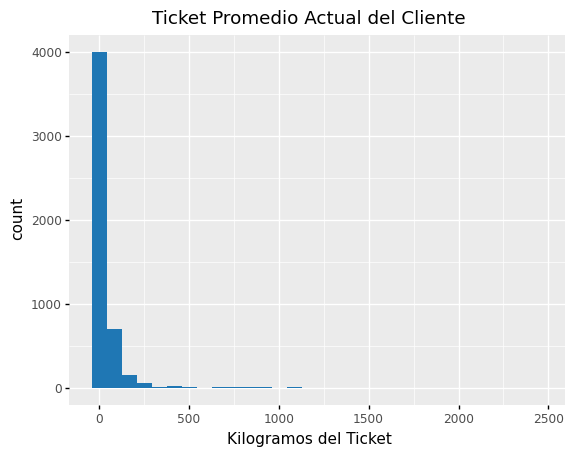

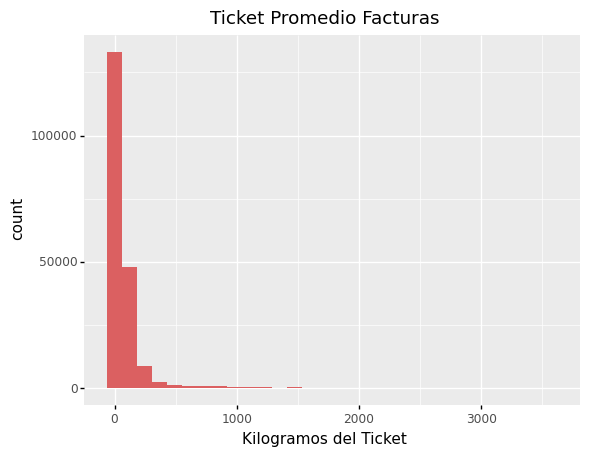

[<ggplot: (104812162660)>, <ggplot: (104805799394)>]

In [83]:
[(
    
    ggplot(
    list_df[i]
    ,aes(x= list_df[i][(list_Xcol[i])]
#          .apply(lambda x: x/1000)
        
        ))
    
    +geom_histogram(fill=List_Colores
                    [i],bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    
     +xlab('Kilogramos del Ticket')
     +ggtitle(List_Title[i])
 )
 for i in range(len(list_df))]#len(list_df)

###### Porcentaje 

In [84]:
from mizani.formatters import percent_format

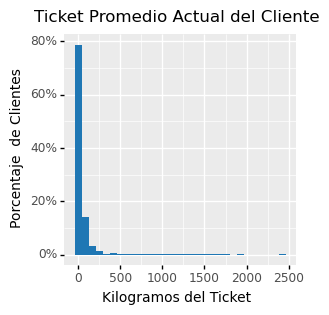

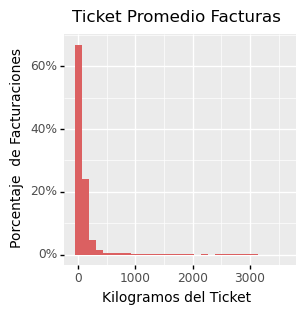

[<ggplot: (104812034148)>, <ggplot: (104806119632)>]

In [85]:
List_Graph_histo_Porcj=[(
    
    ggplot(
    list_df[i]
    ,aes(x= list_df[i][(list_Xcol[i])]
#          .apply(lambda x: x/1000)
        ,y=after_stat('width*density')
        ))
    
    +geom_histogram(fill=List_Colores
                    [i],bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    +xlab('Kilogramos del Ticket')
    +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

)
 for i in range(len(list_df))]#len(list_df)

List_Graph_histo_Porcj

#### Save pdf /png 

##### PNG 

```python
j=0
for i in List_Title:
    G_Lista=List_Graph_histo_Porcj
    file_name=('Histograma ('+ i +') del Canal_Tradic_ sobre el '+Y_producto)
    
    pngfill= Png_file_direct_Graphic_Canal_Material+"\\Otros Atributos\\Ticket"

    
    
    print('-----------\n Nombre del archivo \n',
          file_name,
          '\n Dirección \n',pngfill)
    ggsave(plot = G_Lista[j]
       ,filename = file_name, 
       path =pngfill
      ,dpi = 300
      )
    j+=1
```

##### PDF 

 ```python
#============================
#
#============================
file_name=('Histogramas ( Ticket Promedio ) del Canal_Tradic_ sobre el '+Y_producto)
    
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Otros Atributos\\Ticket"

start_time = time.time()
save_as_pdf_pages(
                    List_Graph_histo_Porcj
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
```

### Lote CV

##### Listado Histogramas 

###### Datos 

In [86]:
list_df=[df_group

         ,data_i_Ticket

#          ,df_F_row_Promedio
        ]

list_Xcol=[
#             'Monetary Actual'
Dic_col['Ticket Customers'][1]
#              ,'Monetary'
,Dic_col['Ticket Row'][1]
            ]

List_Colores=['#1F77B4', '#DB6061','#57DB5F']

List_Title=[ Dic_col['Ticket Customers'][1]+ ' del Cliente'

             , Dic_col['Ticket Row'][1] +' Facturas'

#             ,'Monetary Promedio del Cliente'
            ]

###### Cantidad de datos

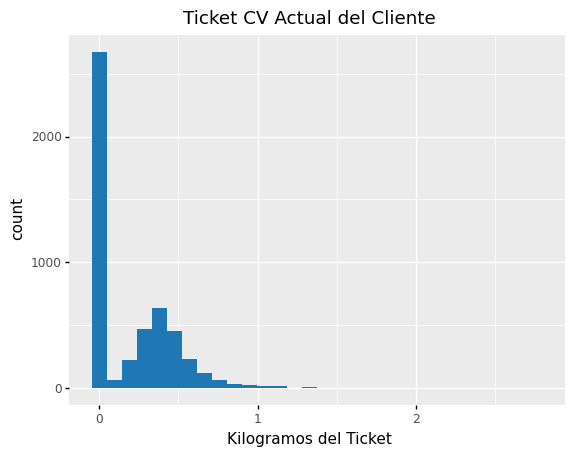

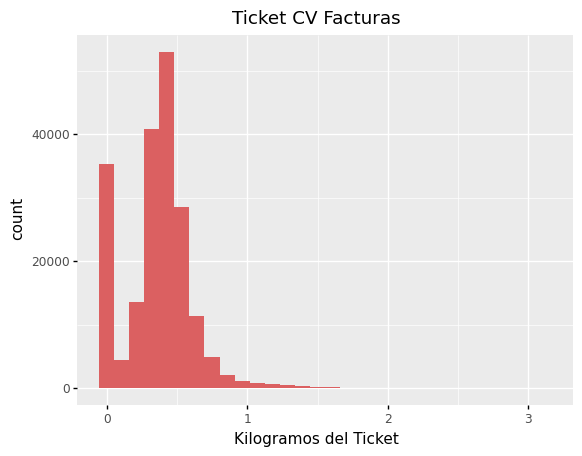

[<ggplot: (104800706292)>, <ggplot: (104705507088)>]

In [87]:
[(
    
    ggplot(
    list_df[i]
    ,aes(x= list_df[i][(list_Xcol[i])]
#          .apply(lambda x: x/1000)
        
        ))
    
    +geom_histogram(fill=List_Colores
                    [i],bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    
     +xlab('Kilogramos del Ticket')
     +ggtitle(List_Title[i])
 )
 for i in range(len(list_df))]#len(list_df)

###### Porcentaje 

In [88]:
from mizani.formatters import percent_format

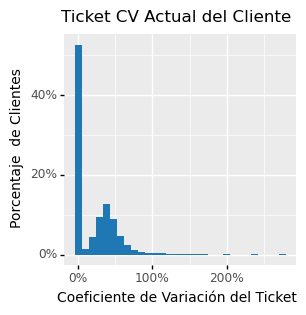

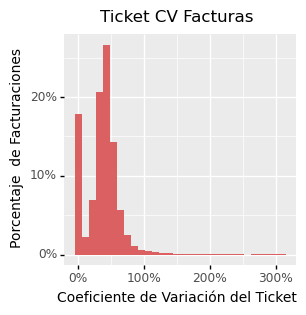

[<ggplot: (104806174621)>, <ggplot: (104699418838)>]

In [89]:
List_Graph_histo_Porcj=[(
    
    ggplot(
    list_df[i]
    ,aes(x= list_df[i][(list_Xcol[i])]
#          .apply(lambda x: x/1000)
        ,y=after_stat('width*density')
        ))
    
    +geom_histogram(fill=List_Colores
                    [i],bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    +xlab('Coeficiente de Variación del Ticket')
    +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#          +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )
+scale_x_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])


)
 for i in range(len(list_df))]#len(list_df)

List_Graph_histo_Porcj

#### Save pdf /png 

##### PNG 

In [90]:
List_Title

['Ticket CV Actual del Cliente', 'Ticket CV Facturas']

```python
j=0
for i in List_Title:
    G_Lista=List_Graph_histo_Porcj
    file_name=('Histograma ('+ i +') del Canal_Tradic_ sobre el '+Y_producto)
    
    pngfill= Png_file_direct_Graphic_Canal_Material+"\\Otros Atributos\\Ticket"

    
    
    print('-----------\n Nombre del archivo \n',
          file_name,
          '\n Dirección \n',pngfill)
    ggsave(plot = G_Lista[j]
       ,filename = file_name, 
       path =pngfill
      ,dpi = 300
      )
    j+=1
```

##### PDF 

 ```python
#============================
#
#============================
file_name=('Histogramas ( Ticket CV ) del Canal_Tradic_ sobre el '+Y_producto)
    
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Otros Atributos\\Ticket"

start_time = time.time()
save_as_pdf_pages(
                    List_Graph_histo_Porcj
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
```

## Grafico de dispersión

In [43]:
Y_Graph=Dic_col['Ticket Customers'][0]
X_Graph=Dic_col['Ticket Customers'][1]
(ggplot(Clientes_i,
      aes(x=X_Graph,
         y=Y_Graph
#          ,color='Cliente'
         )
      )
+geom_point()
)

NameError: name 'Clientes_i' is not defined

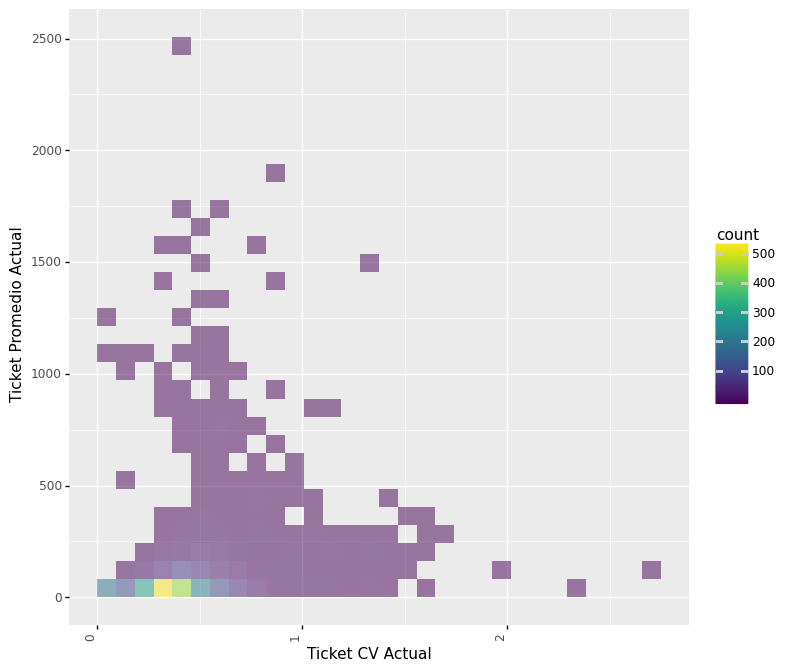

<ggplot: (104692648424)>

In [106]:
df=Clientes_i.copy()
Y_Graph=Dic_col['Ticket Customers'][0]
X_Graph=Dic_col['Ticket Customers'][1]
# Color_Graph=Dic_col['Ticket Customers'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
# +facet_grid('.~Año')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,8)) 

)      

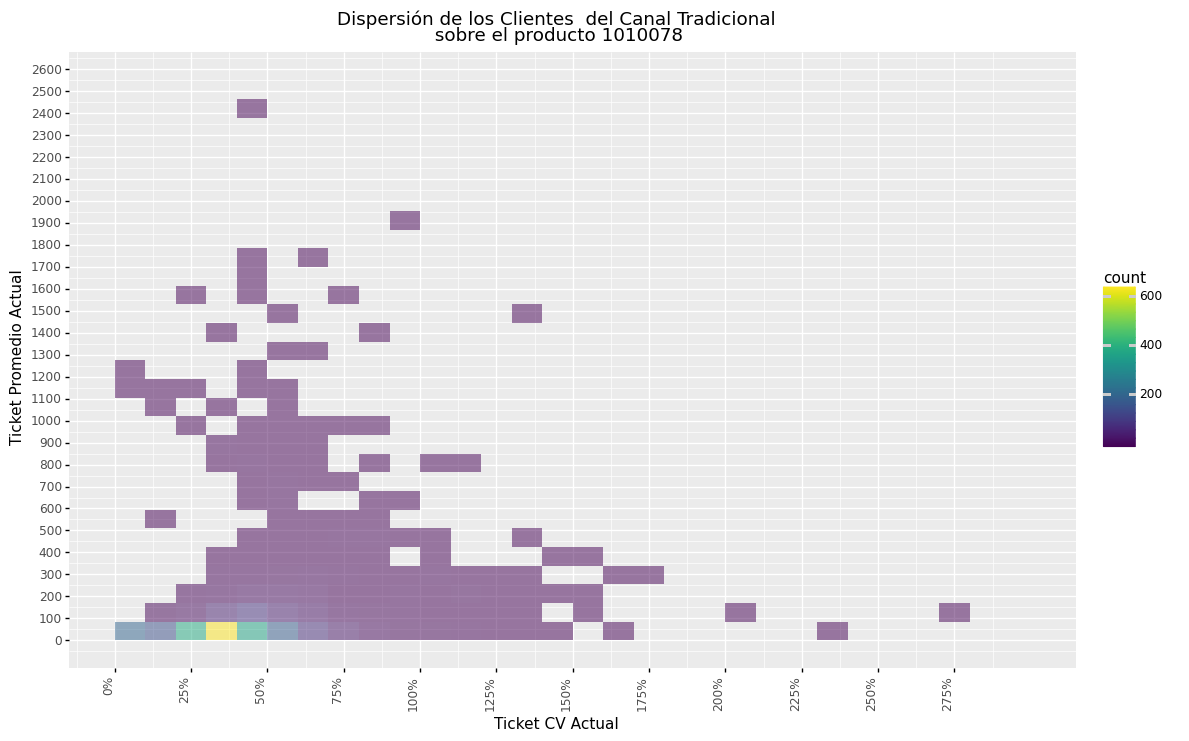

<ggplot: (104812209613)>

In [147]:
df=Clientes_i.copy()
Y_Graph=Dic_col['Ticket Customers'][0]
X_Graph=Dic_col['Ticket Customers'][1]
# Color_Graph=Dic_col['Ticket Customers'][0]

#int
# df[X_Graph]=df[X_Graph].astype('int64')

# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
# df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

G_calor_densidad_Dips=(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
 
+scale_y_continuous(limits=(0,2550)
                    ,breaks=[i for i in range(0,2700,100)]
                   )
+scale_x_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]
                    ,limits=(0,3)
                    ,breaks=[i/100 for i in range(0,300,25)]
                   )
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 
+ggtitle('Dispersión de los Clientes  del Canal '+ Tipo_de_Cliente+ '\n sobre el producto '+ Y_producto)
)   
G_calor_densidad_Dips

```python
file_name=('G Calor Dips('+ Dic_col['Ticket Customers'][0] +'_'+
           Dic_col['Ticket Customers'][1]
           +') del Canal_Tradic_ sobre el '+Y_producto)

pngfill= Png_file_direct_Graphic_Canal_Material+"\\Otros Atributos\\Ticket"



print('-----------\n Nombre del archivo \n',
      file_name,
      '\n Dirección \n',pngfill)
ggsave(plot = G_calor_densidad_Dips
   ,filename = file_name, 
   path =pngfill
  ,dpi = 300
      )
```

### Caso atipico 

In [166]:
Clientes_i[Dic_col['Ticket Customers'][1]].max()

2.750346404451558

In [168]:
Clientes_i[Clientes_i[Dic_col['Ticket Customers'][1]]>2.7]

,Cliente,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual
1791,15609507,121.144928,333.190516,2.750346


       Kilos Venta KG       Precio
count       69.000000    69.000000
mean       121.144928  1320.202899
std        333.190516   126.295240
min         21.000000   900.000000
25%         22.000000  1290.000000
50%         22.000000  1350.000000
75%         44.000000  1390.000000
max       2207.000000  1490.000000


array([[<AxesSubplot:title={'center':'Kilos Venta KG'}>,
        <AxesSubplot:title={'center':'Precio'}>]], dtype=object)

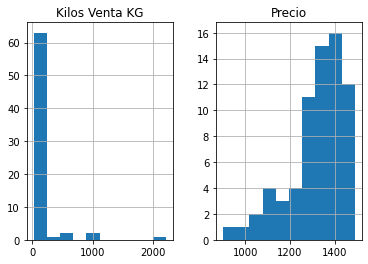

In [170]:
print(data_i_Ticket[data_i_Ticket.Cliente=='15609507'][Dic_col['Base']].describe())
data_i_Ticket[data_i_Ticket.Cliente=='15609507'][Dic_col['Base']].hist()

In [185]:
print(data_i_Ticket[data_i_Ticket.Cliente=='15609507'][Dic_col['Base']].describe())
data_i_Ticket[(data_i_Ticket.Cliente=='15609507')
             &(data_i_Ticket[Dic_col['Base'][1]]>400)
             ]\
            [  Dic_col['Base']+Dic_col['Fecha'] ]

       Kilos Venta KG       Precio
count       69.000000    69.000000
mean       121.144928  1320.202899
std        333.190516   126.295240
min         21.000000   900.000000
25%         22.000000  1290.000000
50%         22.000000  1350.000000
75%         44.000000  1390.000000
max       2207.000000  1490.000000


,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural,Día Semana,Semana,Mes,Año
133286,1010078(Trutro Entero Selección),661,1000,15609507,2019-02-14,Jueves,7,Febrero,2019
133287,1010078(Trutro Entero Selección),441,1050,15609507,2019-03-01,Viernes,9,Marzo,2019
133290,1010078(Trutro Entero Selección),662,1100,15609507,2019-11-16,Sábado,46,Noviembre,2019
133291,1010078(Trutro Entero Selección),2207,900,15609507,2020-01-29,Miércoles,5,Enero,2020
133342,1010078(Trutro Entero Selección),1108,1090,15609507,2021-08-07,Sábado,31,Agosto,2021
133345,1010078(Trutro Entero Selección),1101,1150,15609507,2021-09-01,Miércoles,35,Septiembre,2021


In [189]:
data_i_Ticket[(data_i_Ticket.Cliente=='15609507')
             &(data_i_Ticket[Dic_col['Base'][1]]>400)
             ]\
            [  Dic_col['Base']+Dic_col['Fecha'] ].iloc[1]['Día natural']

datetime.date(2019, 3, 1)

In [196]:
# print(data_i_Ticket[data_i_Ticket.Cliente=='15609507'][Dic_col['Base']].describe())
Out_L=data_i_Ticket[(data_i_Ticket.Cliente=='15609507')]
Out_L[Out_L['Día natural']>datetime.date(2020, 1, 28)]\
[  Dic_col['Base']+Dic_col['Fecha'] ]

,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural,Día Semana,Semana,Mes,Año
133291,1010078(Trutro Entero Selección),2207,900,15609507,2020-01-29,Miércoles,5,Enero,2020
133292,1010078(Trutro Entero Selección),44,1250,15609507,2020-04-29,Miércoles,18,Abril,2020
133293,1010078(Trutro Entero Selección),44,1180,15609507,2020-05-06,Miércoles,19,Mayo,2020
133294,1010078(Trutro Entero Selección),44,1080,15609507,2020-05-09,Sábado,19,Mayo,2020
133295,1010078(Trutro Entero Selección),22,1100,15609507,2020-07-08,Miércoles,28,Julio,2020
...,...,...,...,...,...,...,...,...,...
133350,1010078(Trutro Entero Selección),22,1350,15609507,2021-10-06,Miércoles,40,Octubre,2021
133351,1010078(Trutro Entero Selección),22,1450,15609507,2021-10-09,Sábado,40,Octubre,2021
133352,1010078(Trutro Entero Selección),22,1450,15609507,2021-10-13,Miércoles,41,Octubre,2021
133353,1010078(Trutro Entero Selección),22,1450,15609507,2021-10-16,Sábado,41,Octubre,2021


       Kilos Venta KG       Precio  Ticket Promedio  Ticket CV
count       64.000000    64.000000        64.000000  64.000000
mean        96.515625  1337.718750       205.343750   2.458155
std        328.737508   110.291312       137.492112   0.591708
min         21.000000   900.000000       101.930000   0.518800
25%         22.000000  1290.000000       120.755000   2.158900
50%         22.000000  1350.000000       141.640000   2.692350
75%         22.000000  1390.000000       231.487500   2.865950
max       2207.000000  1490.000000       731.500000   3.102100


array([[<AxesSubplot:title={'center':'Kilos Venta KG'}>,
        <AxesSubplot:title={'center':'Precio'}>],
       [<AxesSubplot:title={'center':'Ticket Promedio'}>,
        <AxesSubplot:title={'center':'Ticket CV'}>]], dtype=object)

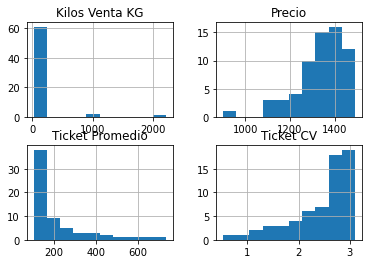

In [199]:
print(Out_L[Out_L['Día natural']>datetime.date(2020, 1, 28)].describe())
Out_L[Out_L['Día natural']>datetime.date(2020, 1, 28)]\
.hist()
# [  Dic_col['Base']+Dic_col['Fecha'] ]

# Anualidad del Ticket 

## Data

El Kilogramo promedio anual de cada cliente.

In [ ]:
Dic_col['Base']+\
Dic_col['Fecha']

In [ ]:
Hist_G_Custom=data_i_Ticket[Dic_col['Base']+\
Dic_col['Fecha']]\
.groupby(['Cliente','Año']).mean().reset_index()

Hist_G_Custom.Año=Hist_G_Custom.Año.astype('int64')
Hist_G_Custom

## Descripción 

### Covarianza

[Covarianza interprestación](https://www.odiolaestadistica.com/estadistica-python/covarianza/)

###### Caso proemdio

###### Calculo

In [ ]:
C_list=[]
Cov_List=[]
for C_i in Hist_G_Custom.Cliente.unique():
#     C_i=Hist_G_Custom.Cliente.unique()[1]

    List_C_X= Hist_G_Custom[Hist_G_Custom.Cliente==C_i]\
            ['Año']
    List_C_Y=\
            Hist_G_Custom[Hist_G_Custom.Cliente==C_i]\
            ['Kilos Venta KG']
    Cov_List.append( np.cov(List_C_X, List_C_Y) [0][1])


###### Descripción 

In [ ]:
pd.DataFrame({'Covarianza':Cov_List}).describe().T

In [ ]:
((pd.DataFrame({'Covarianza':Cov_List})).isnull()).sum()
# ((pd.DataFrame({'Covarianza':Cov_List}))==0).sum()

In [ ]:
print(pd.DataFrame({'Covarianza':Cov_List}).describe().T.to_latex(float_format="{:,.2f}".format))

In [ ]:
pd.DataFrame({'Covarianza':(Cov_List)}).hist(bins=100)

### Graficos 

###### polot Line 

In [97]:
(ggplot(Hist_G_Custom.head(10),
      aes(x='Año',
         y='Kilos Venta KG'
         ,color='Cliente'
         )
      )
+geom_line()
)

NameError: name 'Hist_G_Custom' is not defined

###### matplot 

In [ ]:
import matplotlib.pyplot as plt
C_i=Hist_G_Custom.Cliente.unique()[1]
List_C_X= Hist_G_Custom[Hist_G_Custom.Cliente==C_i]\
        ['Año']
List_C_Y=\
        Hist_G_Custom[Hist_G_Custom.Cliente==C_i]\
        ['Kilos Venta KG']
plt.plot(List_C_X, List_C_Y)
plt.show()

In [ ]:
for C_i in Hist_G_Custom.Cliente.unique():
    List_C_X= Hist_G_Custom[Hist_G_Custom.Cliente==C_i]\
            ['Año']
    List_C_Y=\
            Hist_G_Custom[Hist_G_Custom.Cliente==C_i]\
            ['Kilos Venta KG']
    plt.plot(List_C_X, List_C_Y)
plt.show()